In [2]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##**Recommendation System using Collaborative Filtering**

# What are recommendation systems?
Recommendation system is a system designed to suggest relevant items to users based on their preferences, behaviors, or interactions. It aims to help users discover products, content, or services that they may be interested in but might not have found on their own. These systems are widely used in various industries such as e-commerce, streaming services, and social media.


# Types:   
1. Collaborative Filtering: Uses data from other users with similar preferences.  
2. Content-Based Filtering: Recommends items based on the attributes of products the user has interacted with.  
3. Hybrid Systems: Combines multiple methods for more accurate recommendations.  











#**Collaborative Filtering**
Collaborative filtering works by analyzing patterns of behavior across a user base (e.g., items purchased, movies watched, or songs listened to) and then predicting what a particular user might like, based on the preferences of other users with similar behavior.





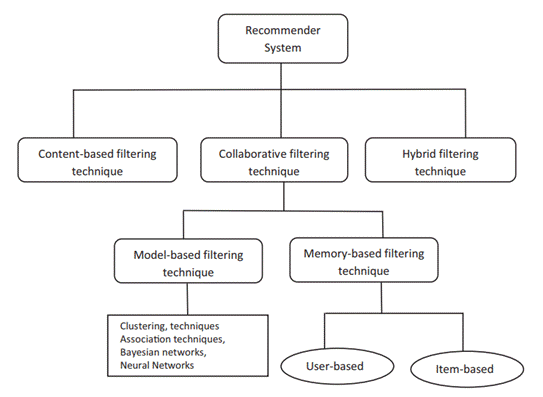



# Data

I have used Amazon review data 2023 for "All beauty products", here is github for the data;
https://amazon-reviews-2023.github.io/

All rights reserved with original authors of the data.


In [3]:
import numpy as np
import pandas as pd
import gzip
import pandas as pd
import json


In [5]:
#I will unzip the gzip file
# Step 1: Path to  Gzip JSON file
gz_file = "/content/drive/MyDrive/amazonreview2023/All_Beauty.jsonl.gz"

# Step 2: Open and read the Gzip JSON file
with gzip.open(gz_file, 'rb') as f:
    # Since this is a JSON lines file, each line is a separate JSON object
    data = [json.loads(line) for line in f]

# Step 3: Convert JSON lines to DataFrame
df2 = pd.json_normalize(data)

# Display the DataFrame
df2.head(10)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True
5,4.0,Pretty Color,The polish was quiet thick and did not apply s...,[{'small_image_url': 'https://images-na.ssl-im...,B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1598567408138,0,True
6,5.0,Handy,Great for many tasks. I purchased these for m...,[],B099DRHW5V,B099DRHW5V,AHREXOGQPZDA6354MHH4ETSF3MCQ,1631885519443,0,True
7,3.0,Meh,These were lightweight and soft but much too s...,[{'small_image_url': 'https://m.media-amazon.c...,B088SZDGXG,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA,1634275259292,0,True
8,5.0,Great for at home use and so easy to use!,This is perfect for my between salon visits. I...,[],B08P2DZB4X,B08P2DZB4X,AFSKPY37N3C43SOI5IEXEK5JSIYA,1627391044559,0,False
9,5.0,Nice shampoo for the money,I get Keratin treatments at the salon at least...,[],B086QY6T7N,B086QY6T7N,AFSKPY37N3C43SOI5IEXEK5JSIYA,1626614511145,0,False


# Meta Data
**rating:**  The numerical score (usually 1 to 5 stars) that the user gives to the product.
**title:** The title of the review, provided by the user.    
**text:** The body or content of the user's review, describing their experience with the product.       
**asin:** The specific Amazon Standard Identification Number (ASIN) for the product being reviewed.   
**parent_asin:** The parent ASIN for the product, representing the main product group under which variations (such as size, color, etc.) are listed.  
**user_id:** The unique identifier for the user who submitted the review.


*ASIN (Amazon Standard Identification Number):A shirt available in various sizes and colors will have a parent_asin for the overall product, and each variant (different size or color) will have its own unique asin.*

# Data Pre-Processing

In [6]:
df2.shape

(701528, 10)

In [7]:
df2.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [8]:
# i will only use the columns i need


selected_columns = ['rating', 'asin','user_id']

# Create a new DataFrame with only the selected columns
df = df2[selected_columns]

# Display the new DataFrame
df.head(15)

,rating,asin,parent_asin,user_id
0,5.0,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ
1,4.0,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ
2,5.0,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ
3,1.0,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
4,5.0,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
5,4.0,B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A
6,5.0,B099DRHW5V,B099DRHW5V,AHREXOGQPZDA6354MHH4ETSF3MCQ
7,3.0,B088SZDGXG,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA
8,5.0,B08P2DZB4X,B08P2DZB4X,AFSKPY37N3C43SOI5IEXEK5JSIYA
9,5.0,B086QY6T7N,B086QY6T7N,AFSKPY37N3C43SOI5IEXEK5JSIYA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rating       701528 non-null  float64
 1   asin         701528 non-null  object 
 2   parent_asin  701528 non-null  object 
 3   user_id      701528 non-null  object 
dtypes: float64(1), object(3)
memory usage: 21.4+ MB


In [10]:
df.dtypes

,0
rating,float64
asin,object
parent_asin,object
user_id,object


In [11]:
#descriptive stat
df.describe()['rating'].T

,rating
count,701528.000000
mean,3.960245
std,1.494452
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [13]:
#Check for missing values
print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 rating         0
asin           0
parent_asin    0
user_id        0
dtype: int64


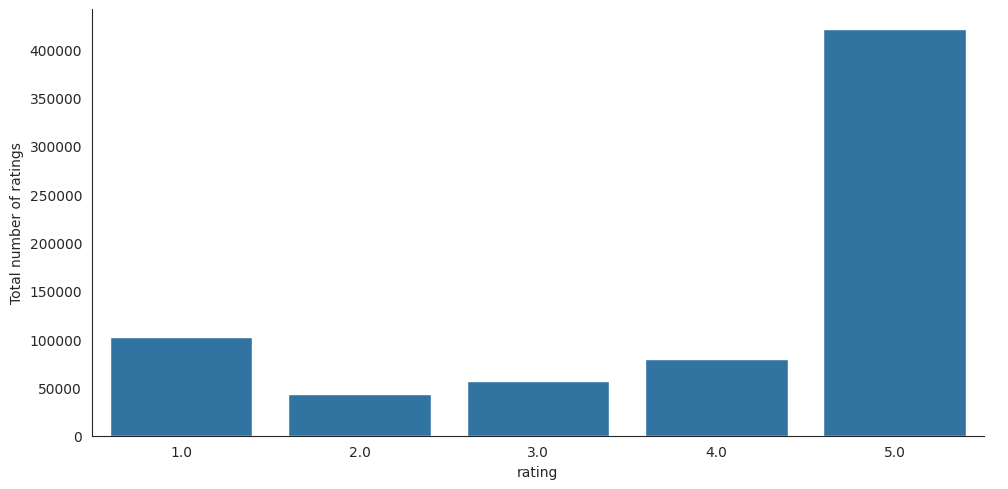

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot(x="rating", data=df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

plt.show()  # To display the plot


**It seems most users have given 5 star ratings.**

In [15]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user_id)))
print("Total No of products  :", len(np.unique(df.asin)))
print("Total No of categories:", len(np.unique(df.parent_asin)))


Total data 
--------------------------------------------------

Total no of ratings : 701528
Total No of Users   : 631986
Total No of products  : 115709
Total No of categories: 112565


In [16]:
no_of_rated_products_per_user = df.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head(100)

,rating
user_id,
AG73BVBKUOH22USSFJA5ZWL7AKXA,165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q,146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1,115
AHDVSLWHSORYGG3S5QZMVDFNOXUQ,108
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,87
...,...
AGV2YW5B3SCKG6WV422CIITZOGRQ,22
AEYKTZXAWOPJG5MGGMKBLRJR6Q3A_2,22
AGNTJQ2C66IPH76GICZOP4DYBA3Q,22


In [17]:
no_of_rated_products_per_user.describe()

,rating
count,631986.000000
mean,1.110037
std,0.753202
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,165.000000


In [18]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

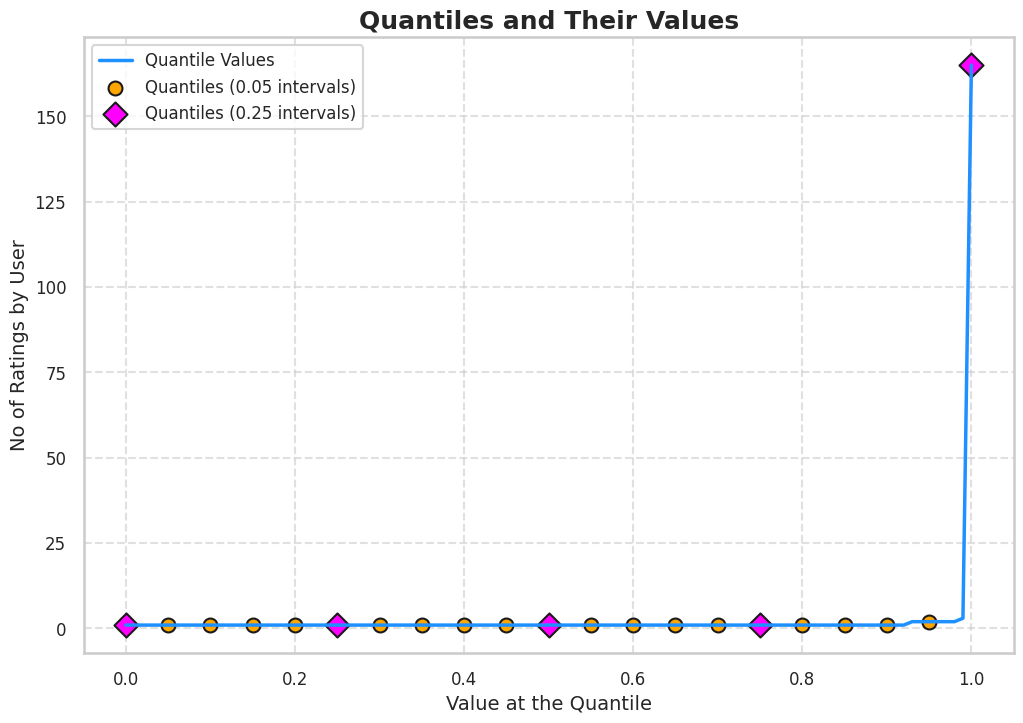

In [19]:

# Set a Seaborn style for the plot
sns.set(style="whitegrid", context="talk")

# Create the figure and axis
plt.figure(figsize=(12, 8))
plt.title("Quantiles and Their Values", fontsize=18, fontweight='bold')

# Plot the quantiles
plt.plot(quantiles, color='dodgerblue', linewidth=2.5, label="Quantile Values")

# Add scatter points for quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', s=100, edgecolor='k', label="Quantiles (0.05 intervals)")

# Add scatter points for quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='magenta', s=150, marker='D', edgecolor='k', label="Quantiles (0.25 intervals)")

# Add labels and legend
plt.ylabel('No of Ratings by User', fontsize=14)
plt.xlabel('Value at the Quantile', fontsize=14)
plt.legend(loc='best', fontsize=12)

# Add a grid and format ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [20]:
print('\n No of rated product more than 30 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 30)) )



 No of rated product more than 30 per user : 53



In [21]:
#Getting the new dataframe which contains users who has given 30 or more ratings

new_df=df.groupby("asin").filter(lambda x:x['rating'].count() >=30)

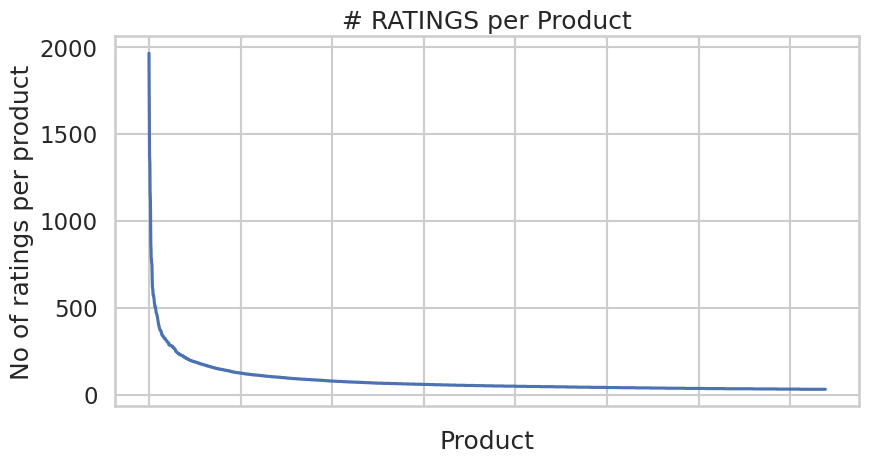

In [22]:
no_of_ratings_per_product = new_df.groupby(by='asin')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [23]:
#Average rating of the product

new_df.groupby('asin')['rating'].mean().head()

,rating
asin,
069267599X,4.780488
0985393300,4.900000
B000050FDE,4.494898
B000067E30,4.157143
B000068PBJ,4.000000


In [24]:
new_df.groupby('asin')['rating'].mean().sort_values(ascending=False).head()

,rating
asin,
B078W2K47L,5.000000
B01F0RV4G6,5.000000
B07V396PR2,4.976190
B088WBKSY4,4.970588
B0B14N2QZF,4.970588


In [25]:
#Total no of rating for product

new_df.groupby('asin')['rating'].count().sort_values(ascending=False).head()

,rating
asin,
B007IAE5WY,1962
B00EEN2HCS,1750
B07C533XCW,1513
B00R1TAN7I,1372
B08L5KN7X4,1343


In [26]:
ratings_mean_count = pd.DataFrame(new_df.groupby('asin')['rating'].mean())

In [27]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('asin')['rating'].count())

In [28]:
ratings_mean_count.head()

,rating,rating_counts
asin,,
069267599X,4.780488,41
0985393300,4.900000,30
B000050FDE,4.494898,196
B000067E30,4.157143,70
B000068PBJ,4.000000,44


In [29]:
ratings_mean_count['rating_counts'].max()

1962

<Axes: >

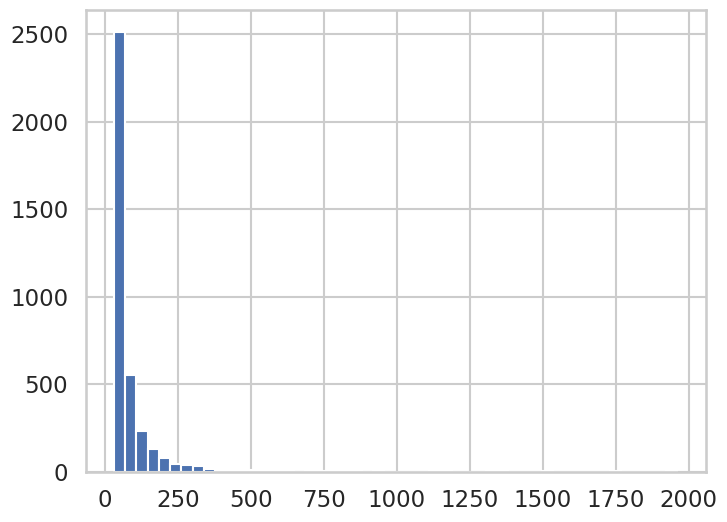

In [30]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Axes: >

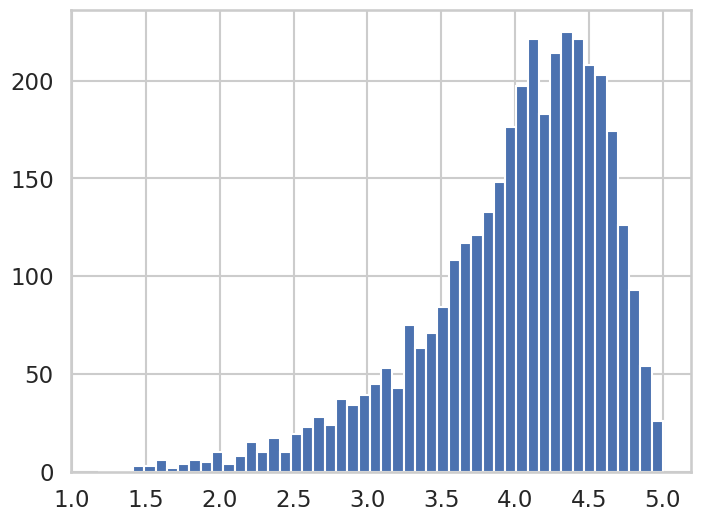

In [31]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

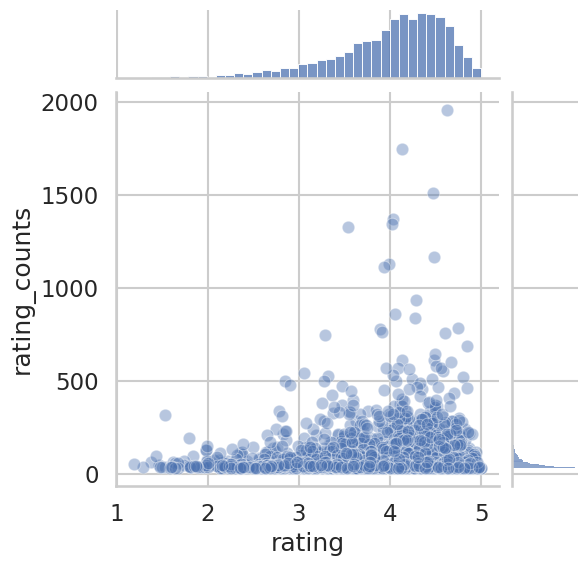

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<Axes: xlabel='asin'>

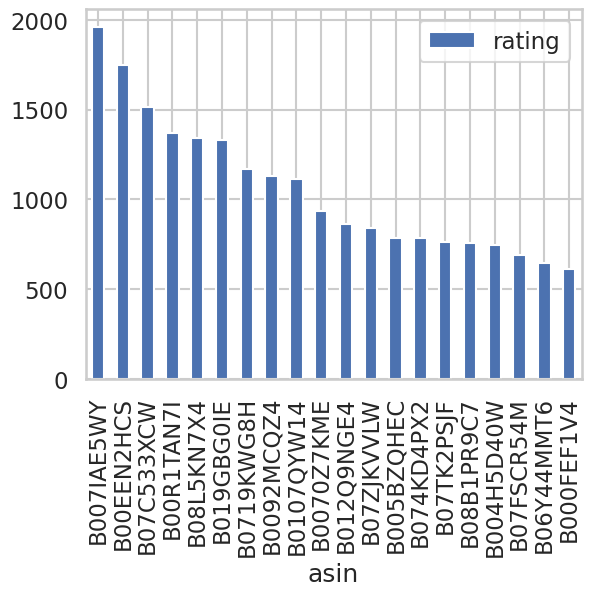

In [33]:
popular_products = pd.DataFrame(new_df.groupby('asin')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(20).plot(kind = "bar")

# 1. Neighbourhood based (Item-Item recommedation)

*Approach*: This method recommends items similar to those the user has previously liked by calculating item-to-item similarity.   
*Goal*: To predict which items the user might enjoy based on similar items they’ve rated or interacted with.  

In [34]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357290 sha256=b18314110a66db00461502765ad4e608e914eadcbaf109b3375b780117a9f689
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [35]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [36]:
# Create a Reader object with the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the dataset from the DataFrame
data = Dataset.load_from_df(new_df[['user_id', 'asin', 'rating']], reader)


In [37]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [38]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [39]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [40]:
test_pred

[Prediction(uid='AEWGYXZ5RT2ARMX3GZF246DEA6OA', iid='B095SHWTG6', r_ui=5.0, est=4.03516937946289, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AHEHZE2FGQDRZIMGW3DJ4UQ4FJMA', iid='B093H8ZWM9', r_ui=5.0, est=4.03516937946289, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AETEVDR7K52P5RB3NT3JXFIKZFXQ', iid='B09GTZ6GQG', r_ui=1.0, est=4.03516937946289, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AE725SH6H47WL2BWJ37J3H6VQZTA', iid='B007N47C66', r_ui=5.0, est=4.03516937946289, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AHR2HCD3Y6EXH54H4AYWRKB52SZQ', iid='B006WEZ5WQ', r_ui=4.0, est=4.03516937946289, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AG5LR2Z656VXFRQYQT2RNLI7SMPQ', iid='B005BZQHEC', r_ui=5.0, est=4.03516937946289, details={'was_impossible': 

In [41]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.4366


1.4366437270783283

The value suggests that model's predictions are reasonably close to the actual ratings, but there is still room for improvement.

Low RMSE: Indicates high accuracy in predicting ratings. below 1.   
Moderate RMSE: Values between 1.0 and 2.0 are common and often acceptable.   
High RMSE: Values above 2.0   

# Counclusion
After training the model uses the relationships it has learned between items (since it's item-based) to predict how much a user would like an item they haven't interacted with.
RSME score also suggests model is a fair predictor


# 2. Model-based collaborative filtering system

*Approach:* This method uses matrix factorization to decompose the user-item interaction matrix into latent factors, capturing hidden relationships between users and items.   
*Goal:* To predict missing ratings by leveraging the learned latent factors from the decomposition of the user-item matrix.   


In [42]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='rating', index='user_id', columns='asin', fill_value=0)
ratings_matrix.head()

asin,069267599X,B000050FDE,B000067E30,B000068PBJ,B00009RB0X,B00009RB0Y,B00009RB1I,B0000ZLF18,B00011JN5G,B00011QUDE,...,B09ZY58HPT,B0B1LZ7ZSK,B0B1THGFD6,B0B5XG7H1G,B0B5XJM4LX,B0BF9TRWV1,B0BFWBKRSG,B0BGN62HJN,B0BNWXRQ18,B0BR96M4Y8
user_id,,,,,,,,,,,,,,,,,,,,,
AE242RFKVOAWUWYFD2JQVUSZY7TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE24IYRU5SS53LJCA66CGHTAEZVQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE24NAF5NDB2PCUWHLRCXPLGFCGQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE27VWZJJ7VKJXRZC7W7MHUBNTGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE2AEAGNNZRDFJA7VCGOPB7IMLOQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**I filled unknowns with 0 , becasue utilitity matrix was sparce**

In [43]:
ratings_matrix.shape

(8975, 2975)

In [44]:
X = ratings_matrix.T
X.head()

user_id,AE242RFKVOAWUWYFD2JQVUSZY7TA,AE24IYRU5SS53LJCA66CGHTAEZVQ,AE24NAF5NDB2PCUWHLRCXPLGFCGQ,AE27VWZJJ7VKJXRZC7W7MHUBNTGA,AE2AEAGNNZRDFJA7VCGOPB7IMLOQ,AE2AI5WZD74XIBJL7X5GREATR7AQ,AE2AXZS54WKE3J5ZXA3NZSPUNV3Q,AE2AZ6NGD6NWTPYLZAOCUJQ5XV2Q,AE2BA7WS6WJ5WTO7D4LGRQKZKFLQ,AE2BKB6KLBOHT42P44NSF3CUDNQA,...,AHZXJ4N5GBXLRDEKD37LB6ZZTPWQ,AHZXVZECCDWVAHMZO5ORUMYQ4Y6Q,AHZYO3MDL347DZGG4WRZLEJ3LR3Q,AHZYQGQUHBF4YIMNMUPHFHUDTOXQ,AHZYQWEOFG4GKOFO2A3I7KLVEYDA,AHZZJQYNVZUJNPNQ737ITGEQUB4A,AHZZONVVQ454QUCD23HMD5E7VNIQ,AHZZPPV72DKCQ57X7YXCVPM54KSQ,AHZZPUYPNZQ7QXK55HGGE3Z7TTEA,AHZZXK4KCAJTTIZZB76ZNJKDKRMQ
asin,,,,,,,,,,,,,,,,,,,,,
069267599X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000050FDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000067E30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000068PBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00009RB0X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X.shape

(2975, 8975)

Unique products in subset of data

In [46]:
X1 = X

In [47]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(2975, 10)

Truncated Singular Value Decomposition (TruncatedSVD) from sklearn.decomposition. This is a variant of Singular Value Decomposition (SVD) used for dimensionality reduction. Tthi is typically applied to sparse matrices and is well-suited for text data or large-scale recommender systems.

In [48]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(2975, 2975)

In [49]:
X.index[75]

'B000PKKAGO'

Index # of product ID purchased by customer

In [50]:
i = "B000PKKAGO"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [51]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(2975,)

Recommending top 25 highly correlated products in sequence

In [52]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:20]

['B000068PBJ',
 'B0001HYJW2',
 'B0002DO11E',
 'B0006PJTKG',
 'B000I1CFC2',
 'B000LLYFUE',
 'B000MT1GHA',
 'B000OQFVLS',
 'B000V5F2NO',
 'B0018BVETG',
 'B001B9VSFK',
 'B001CZIFVI',
 'B001VPEFPY',
 'B002AA8G4K',
 'B0033D0HX6',
 'B003GWFFPE',
 'B003ILUQPM',
 'B004F0KBDW',
 'B0052KBW28',
 'B0052YFCSO']

Here are the top 20 beauty products from all categories recommended to the customer, based on the purchase history of other users on the website.


# Conclusion

SVD breaks down the user-item interaction matrix into latent factors for users and items. Based on these latent factors, SVD predicts how much a user will like each product, even if they haven't interacted with it yet. After predicting ratings for all products, the system ranks them by the predicted rating